## Understanding CNN Architecture

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, ZeroPadding2D, Input
from keras.models import Model
from keras import optimizers
from keras.preprocessing import image

Using TensorFlow backend.


## 0. Basics
- Input of image-format data is usually 4-D array in Tensorflow
<br> **(num_instance, width, height, depth)** </br>
    - **num_instance:** number of data instances. Usually designated as **None** to accomodate fluctuating data size
    - **width:** width of an image
    - **height:** height of an image
    - **depth:** depth of an image. Color images are usually with depth = 3 (3 channels for RGB). Black/white images are usually with depth = 1 (only one channel)
    
<img src="http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png" style="width: 400px"/>

- Loading image
    - Images can be loaded using load_img() function
    - Images can be converted to numpy array using img_to_array() function

In [7]:
img = image.load_img('dog.jpg', target_size = (200, 200))

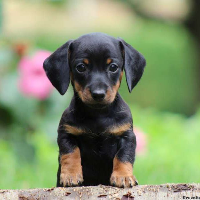

In [8]:
img

In [11]:
img = image.img_to_array(img)

In [12]:
print(img.shape)

(200, 200, 3)


## 1. Padding
- Two types of padding options
    - **'valid'**: no padding (drop right-most columns & bottom-most rows)
    - **'same'**: padding size **p = [k/2]** when kernel size = **k**
- Customized paddings can be given with ZeroPadding**n**D layer

In [17]:
# when padding = 'valid'
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

In [18]:
# 10 filters - 10 activation maps of size 8x8
print(model.output_shape) # Num_inputs*activationmapsize(x*y)*Num_activation_maps

(None, 8, 8, 10)


In [19]:
# when padding = 'same' - Output will be padded with zeros
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [20]:
print(model.output_shape)

(None, 10, 10, 10)


In [23]:
# user-customized padding - one left col+one right col + one top row + one bottom row
# 2 rows and 2 columns will be padded
input_layer = Input(shape = (10, 10, 3))
padding_layer = ZeroPadding2D(padding = (1,1))(input_layer)

model = Model(inputs = input_layer, outputs = padding_layer)

In [24]:
print(model.output_shape)

(None, 12, 12, 3)


## 2. FIlter/kernels
- Number of filters can be designated
- Number of filters equals to the **depth of next layer**

In [12]:
# when filter size = 10
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [13]:
# you could see that the depth of output = 10
print(model.output_shape)

(None, 10, 10, 10)


In [14]:
# when filter size = 20
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 20, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [15]:
# you could see that the depth of output = 20
print(model.output_shape)

(None, 10, 10, 20)


## 3. Pooling
- Usually, max pooling is applied for rectangular region
- pooling size, padding type, and strides can be set similar to convolutional layer

In [29]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [30]:
print(model.output_shape)

(None, 10, 10, 10)


In [31]:
# when 'strides' parameter is not defined, strides are equal to 'pool_size'
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

In [32]:
print(model.output_shape) # 10/2 * 10/2

(None, 5, 5, 10)


In [33]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1), padding = 'valid'))
print(model.output_shape)

(None, 9, 9, 10)


In [34]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(AveragePooling2D(pool_size = (2,2), padding = 'valid'))
print(model.output_shape)

W0721 11:15:38.779067 139818410276672 deprecation_wrapper.py:119] From /home/harsh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



(None, 5, 5, 10)


In [35]:
# globalmaxpooling performs maxpooling over whole channel with depth = 1
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(GlobalMaxPooling2D())
# as the number of filters = 10, 10 values are returned as result of globalmaxpooling2D
print(model.output_shape)

(None, 10)


## 4. Flattening
- To be connected to fully connected layer (dense layer), convolutional/pooling layer should be **"flattened"**
- Resulting shape = **(Number of instances, width X height X depth)**

In [36]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [37]:
print(model.output_shape)

(None, 10, 10, 10)


In [38]:
model.add(Flatten())

In [39]:
print(model.output_shape)

(None, 1000)


## 5. Fully Connected (Dense)
- After flattening layer, fully connected layer can be added
- output shape (number of nodes) should be designated

In [29]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Flatten())
model.add(Dense(50))

In [30]:
print(model.output_shape)

(None, 50)
